Dans le cadre de ce projet, nous somme Ingénieur IA au sein de la startup “Avis Restau”, qui met en relation des clients et des restaurants. Notre entreprise souhaite améliorer sa plateforme avec une nouvelle fonctionnalité de collaboration. 

![Restau](restau.png)

Les utilisateurs pourront par exemple poster des avis et des photos sur leur restaurant préféré. Ce sera aussi l’occasion, pour l’entreprise, de mieux comprendre les avis postés par les utilisateurs.

Voici les différentes étapes que nous allons réaliser :

- analyser les commentaires négatifs pour détecter les différents sujets d’insatisfaction :
 - sélection de quelques milliers de commentaires négatifs,
 - prétraitement des données textuelles,
 - utilisation de techniques de réduction de dimension,
 - visualisation des données de grandes dimensions afin de détecter des mots clés et sujets d’insatisfaction ;
 

- analyser les photos pour déterminer les catégories des photos : 
 - sélection de 100 à 200 photos par catégorie,
 - prétraitement des images. Nous allons tester deux approches, une par extraction de descripteurs (SIFT, ORB ou SURF) et une par Transfer Learning d’un réseau de neurones de type CNN,
 - utilisation de techniques de réduction de dimension,
 - visualisation des données de grandes dimensions en mettant en évidence les catégories des images,
 - vérification que les images sont correctement regroupées selon les catégories en réalisant un clustering, puis une comparaison des clusters avec les catégories des images, via un graphique et une mesure. Nous allons analyser également quelles sont les catégories les mieux regroupées,
Cette vérification nous permettra de conclure sur la faisabilité de réaliser ultérieurement une classification supervisée, nous avons bien compris qu’il n’était pas nécessaire à ce stade de réaliser cette classification supervisée ;
 

- collecter un échantillon de données (environ 200 restaurants et leurs revues) via l’API Yelp :
 - récupérer uniquement les champs nécessaires,
 - stocker les résultats dans un fichier exploitable (par exemple CSV).

# Exploration des jeux de données

## Importation des librairie

TODO : 
- voir traitement de text sur nlp
- Commencer la partie texte et avec quelques reviews pour le nettoyage (bag of word) (ne pas prendre toutes les données si j'y arrive pas)

In [52]:
import pandas as pd
import os
import json
import ijson
from IPython.display import display, Image

## Lecture des ressources

In [ ]:
# Liste des fichiers avec lesquels nous allons travailler
print(os.listdir("data/yelp_dataset"))
print(os.listdir("data/yelp_photos"))

Nous avons plusieurs fichiers Json.
Cependant, certains sont très gros, nous allons donc en tirer seulement une partie à l'aide d'un **chunk**.

Nous allons donc attribuer un fichier par dataframe puis nous placeront ces dataframe dans un dictionnaire.

Nous pourrons ainsi continuer notre exploration.

In [ ]:
# Place la liste des fichiers contenu dans nos fichiers de jeu de données
# dans des listes
data_yelp_dataset = os.listdir("data/yelp_dataset")
data_yelp_photos = os.listdir("data/yelp_photos")

dict_df = {}
list_json_illisible = []


def json_to_df(liste, folder, chunksize):
    for i in liste:
        # Condition qui permet de ne lire que les fichiers json et de ne pas
        # lire le fichier json non propre (busniess)
        if i[-5:-1] == '.jso':
            try:
                # Place dans la variable df un objet Json avec un nombre de chunk
                df = pd.read_json('data/'+folder+''+i+'',
                                  lines=True, orient='record', chunksize=chunksize)
                print(df)
                # Parcours l'objet json et place la dataframe dans le dictionnaire
                # 'dict_df'
                for y in df:
                    dict_df[str(i)] = y
                    break
            except ValueError:
                list_json_illisible.append(str(i))
                continue

In [ ]:
json_to_df(data_yelp_dataset, 'yelp_dataset/', 15000)

In [ ]:
dict_df.keys()

In [ ]:
list_json_illisible

Ces json sont illisible, voyons voir pour quelle raison. 

In [ ]:
openfile = open('data/yelp_dataset/yelp_academic_dataset_business.json')
x = 0
for i in openfile:
    if x < 2:
        print(i)
        x += 1
    else:
        break

openfile = open('data/yelp_dataset/yelp_academic_dataset_checkin.json')
x = 0
for i in openfile:
    if x < 2:
        print(i)
        x += 1
    else:
        break

Les json sont illisible parce que mal formater, mal écrit. 

Nous avons donc recherché sur google si ces json étaient disponible en version propre.

Nous les avons trouvé à cette adresse :
https://www.kaggle.com/datasets/yelp-dataset/yelp-dataset?resource=download&select=yelp_academic_dataset_checkin.json

Nous les avons placer dans un sous dosser appelé **clean_json**.

Nous pouvons maintenant les ajouter également dans notre dictionnaire.

In [ ]:
data_yelp_dataset_clean = os.listdir("data/yelp_dataset/clean_json")
json_to_df(data_yelp_dataset_clean, 'yelp_dataset/clean_json/', 15000)

In [ ]:
dict_df.keys()

Nous avons maintenant toutes nos données texte en dataframe.

Passons aux données photos, nous n'avons qu'un seul fichier json à passer dans une dataframe.

In [ ]:
dict_df_photo = {}

df = pd.read_json('data/yelp_photos/photos.json',
                  lines=True, orient='record', chunksize=15000)
print(df)
# Parcours l'objet json et place la dataframe dans le dictionnaire 
# 'dict_df_photo'
for y in df:
    dict_df_photo['photos.json'] = y
    break

In [31]:
dict_df_photo['photos.json']

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food
...,...,...,...,...
14995,VMYtxjWh52vCKuZz9HKp9g,YMxOjiZfWyN94L8XkZGPRQ,"Bacon, egg and cheese sandwich with avocado added",food
14996,1nxRvbtwcxSao2Vm-JMQ_w,LD-IB5vYI18lEA-QlKY6tA,Large vanilla cone,food
14997,czXD1Z8vkvzTJvy3ewdxuA,ZBTVbCcc8OabC9Q5rIaGlw,Million Dollar Bacon,food
14998,8hXXeqSCLulcC6jptOyNdg,4SRl5od0lY33oK1GMbA23A,Husk burger for happy hour ($10),food


Nos données sont maintenant chargées.

Nous avons aussi d'autre ressources que des json : 

   - **Les conditions générales de yelp en pdf.**
   - **Des photos en format png**
    
Nous avons dans notre dataframe 'photos.json' des id de photos, voyons si cela correspond aux noms des photos que nous avons.

In [34]:
os.listdir("data/yelp_photos/photos")

['--0h6FMC0V8aMtKQylojEg.jpg',
 '--3JQ4MlO-jHT9xbo7liug.jpg',
 '--3P3fjPrScy06XVLi4vhg.jpg',
 '--4DfhW2sJvjeC90KEDX3g.jpg',
 '--5V3mRlhb3zqE5yF4Gpaw.jpg',
 '--7SiWWk_OHbdmcU4pNDQw.jpg',
 '--8pNvGp9ICBjJVck2OnTQ.jpg',
 '--9cH8_rrskfmYvONaJpgQ.jpg',
 '--9zKbcEd-DXH4ZUiEI4UA.jpg',
 '--AU_cPMgrWSPluP1v8n_Q.jpg',
 '--CXLzKP6hhYVs54GVOT0Q.jpg',
 '--cxOTSQzInwUOAPwceUuA.jpg',
 '--dacvi4Y_8ACp-10nafMA.jpg',
 '--dM6T1gVl050fS_vkV3Xg.jpg',
 '--DqlLaO1I0D7uFgvRInww.jpg',
 '--e8vgtonVwPXG3n6lfBLA.jpg',
 '--EjX0WhEFSDVv9mtAeiOQ.jpg',
 '--FrnLlpbF2_dRRlZ_dovg.jpg',
 '--Giyv3aAypzllFEp5d8Eg.jpg',
 '--gjH9oA92f7OuTSovXjCg.jpg',
 '--GXT_8apxBAs7epcHf-zA.jpg',
 '--hMxFnB1b_UeDwzsOCmCA.jpg',
 '--HO-fMoTVbYnxVZdWAIGQ.jpg',
 '--I-ThZdBaYfbSlAQhfOfQ.jpg',
 '--IHD2ZgFPfFMR4qMkLzFA.jpg',
 '--j4xVIdIlYpOmZbs7iszg.jpg',
 '--J8VXQsdPNxPXKCRyqakg.jpg',
 '--k9FyNj0Ztr08wutGppYA.jpg',
 '--Kofko5jy33_vPJOEt4Ow.jpg',
 '--KPaOH7QLrQ1DliVmoacA.jpg',
 '--kP__1IcWsQE0ycWKT0bg.jpg',
 '--lRwPamtV4WMbl3MMhRCw.jpg',
 '--MwzZ

In [35]:
for i in dict_df_photo['photos.json'].head(5)

,photo_id,business_id,caption,label
0,zsvj7vloL4L5jhYyPIuVwg,Nk-SJhPlDBkAZvfsADtccA,Nice rock artwork everywhere and craploads of ...,inside
1,HCUdRJHHm_e0OCTlZetGLg,yVZtL5MmrpiivyCIrVkGgA,,outside
2,vkr8T0scuJmGVvN2HJelEA,_ab50qdWOk0DdB6XOrBitw,oyster shooter,drink
3,pve7D6NUrafHW3EAORubyw,SZU9c8V2GuREDN5KgyHFJw,Shrimp scampi,food
4,H52Er-uBg6rNrHcReWTD2w,Gzur0f0XMkrVxIwYJvOt2g,,food


In [44]:
# Nous parcourons les 5 premières lignes de notre df photo
for i in dict_df_photo['photos.json']['photo_id'].head(5):
    # Nous ajoutons l'extension de photos à leurs id pour qu'elles puissent 
    # être trouvées si elles existent
    i=i+'.jpg'
    if i in os.listdir("data/yelp_photos/photos"):
        print(True)

True
True
True
True
True


Très bien, l'id et le nom des photos correspondent bien.

Par simple curisosité regardons ces photos.

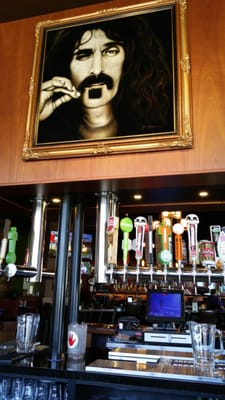

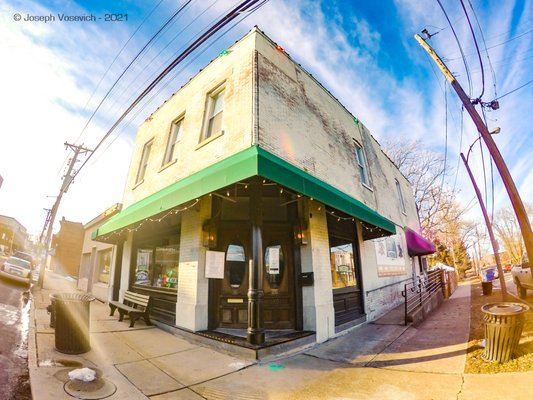

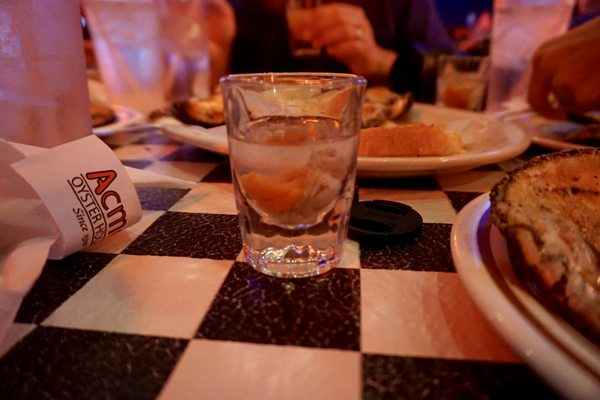

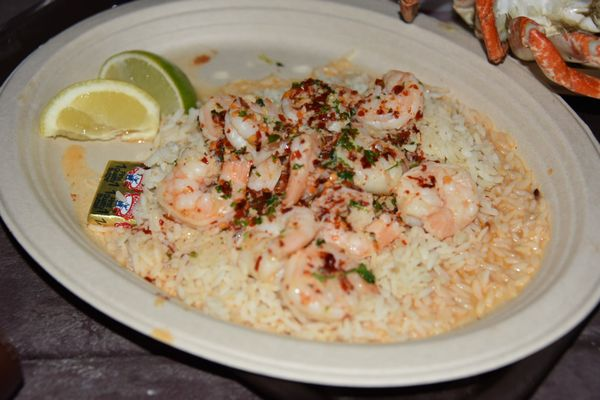

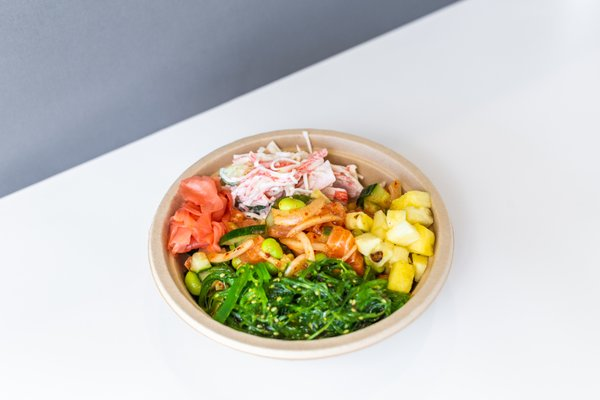

In [60]:
liste_images=[]
for i in dict_df_photo['photos.json']['photo_id'].head(5):
    i='data/yelp_photos/photos/'+i+'.jpg'
    liste_images.append(i)
    Image(filename=i)
    
for image in liste_images:
    img = Image(image)
    display(img)

Cela fonctionne, mais nous verrons tout ça plus tard, continuons notre lecture des ressources.